# Exercise 4

Work on this before the next lecture on 26 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/8). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

The overall idea of this exercise is to get you using and building convolutional neural networks.

## Question 1

In the last exercise you built a neural network that can classify fashion items using only densely connected layers.

Build on this by using convolutions, pooling, dropout, batch norm, etc in your neural network. Can you outperform your densely connected network?

Start with a small network and a fraction of the data to check if you hooked everything up correctly. Don't go overboard with the size of the network either as even small networks take quite a while to train.

(If you want to experiment with a free GPU checkout https://kaggle.com/kernels .)

In [3]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [16]:
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Input, Dense
from keras.layers import Activation, Flatten
from keras.layers import MaxPool2D, Dropout

from keras.datasets import mnist
from keras import utils


(X_train, y_train), (X_test, y_test) = mnist.load_data()

# convert our data into a rank 3 tensor
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(np.float64)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(np.float64)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

# For experimenting we could add some noise to each image
#X_train_noisy = X_train + 0.05 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_trial = X_train[:8000]
y_trial = y_train[:8000]

In [10]:
X_trial_train, X_val, y_trial_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.25,
                                                  random_state=42)

In [12]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

In [13]:
convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
history_callback = convnet.fit(X_trial, y_trial,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 5600 samples, validate on 2400 samples
Epoch 1/20
5600/5600 [==============================] - 5s 917us/step - loss: 1.2540 - acc: 0.6370 - val_loss: 0.4430 - val_acc: 0.8608
Epoch 2/20
5600/5600 [==============================] - 5s 875us/step - loss: 0.3380 - acc: 0.8979 - val_loss: 0.2755 - val_acc: 0.9225
Epoch 3/20
5600/5600 [==============================] - 5s 887us/step - loss: 0.2302 - acc: 0.9321 - val_loss: 0.2036 - val_acc: 0.9388
Epoch 4/20
5600/5600 [==============================] - 5s 895us/step - loss: 0.1610 - acc: 0.9539 - val_loss: 0.1826 - val_acc: 0.9438
Epoch 5/20
5600/5600 [==============================] - 6s 1ms/step - loss: 0.1226 - acc: 0.9661 - val_loss: 0.1868 - val_acc: 0.9379
Epoch 6/20
5600/5600 [==============================] - 6s 1ms/step - loss: 0.1036 - acc: 0.9689 - val_loss: 0.1511 - val_acc: 0.9542
Epoch 7/20
5600/5600 [==============================] - 5s 911us/step - loss: 0.0857 - acc: 0.9748 - val_loss: 0.1348 - val_acc: 0.9596
Epoc

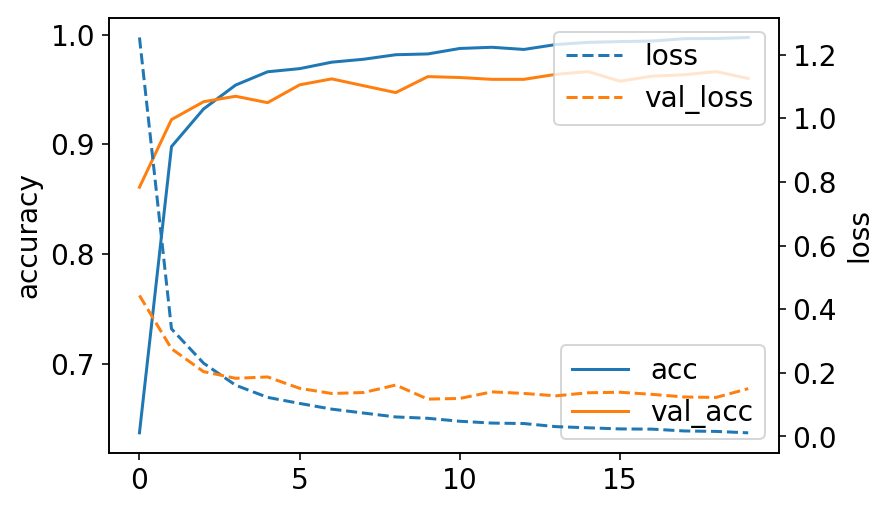

In [15]:
import pandas as pd


df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss");

# Dropout testing

In [17]:
from keras.layers import Dropout

In [18]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Dropout(0.3, noise_shape=None, seed=None)(x)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Dropout(0.3, noise_shape=None, seed=None)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

In [19]:
convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [20]:
history_callback = convnet.fit(X_trial, y_trial,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 5600 samples, validate on 2400 samples
Epoch 1/20
5600/5600 [==============================] - 7s 1ms/step - loss: 1.3626 - acc: 0.5520 - val_loss: 0.4484 - val_acc: 0.8592
Epoch 2/20
5600/5600 [==============================] - 7s 1ms/step - loss: 0.4229 - acc: 0.8716 - val_loss: 0.2519 - val_acc: 0.9313
Epoch 3/20
5600/5600 [==============================] - 7s 1ms/step - loss: 0.2702 - acc: 0.9175 - val_loss: 0.1947 - val_acc: 0.9437
Epoch 4/20
5600/5600 [==============================] - 7s 1ms/step - loss: 0.2063 - acc: 0.9407 - val_loss: 0.1516 - val_acc: 0.9571
Epoch 5/20
5600/5600 [==============================] - 9s 2ms/step - loss: 0.1641 - acc: 0.9480 - val_loss: 0.1407 - val_acc: 0.9571
Epoch 6/20
5600/5600 [==============================] - 8s 1ms/step - loss: 0.1452 - acc: 0.9561 - val_loss: 0.1281 - val_acc: 0.9587
Epoch 7/20
5600/5600 [==============================] - 9s 2ms/step - loss: 0.1240 - acc: 0.9620 - val_loss: 0.1175 - val_acc: 0.9617
Epoch 8/20
560

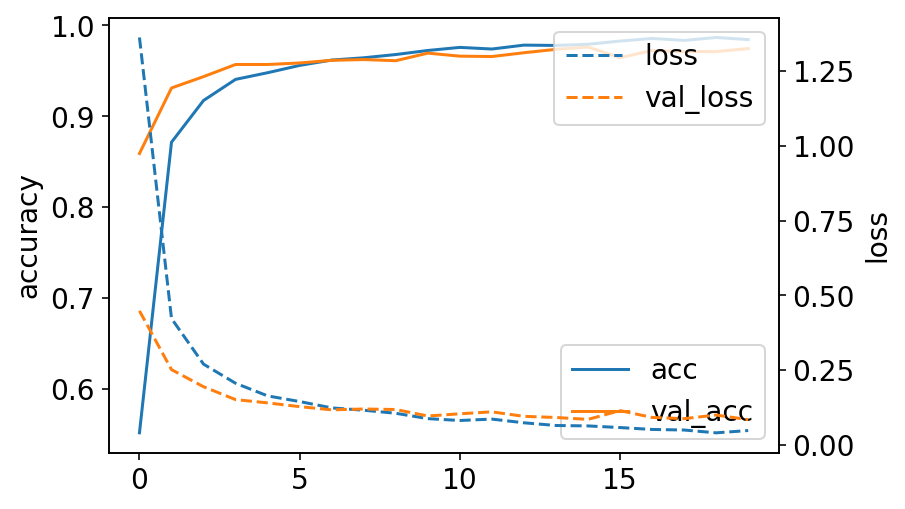

In [21]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss");

#### Dropout usually helps to struggle with overfitting. Eventhough here dataset is relatively small it still works and improves accuracy

## Batch normalization testing

In [23]:
from keras.layers import BatchNormalization

In [27]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = BatchNormalization()(x)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

In [28]:
convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [29]:
history_callback = convnet.fit(X_trial, y_trial,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 5600 samples, validate on 2400 samples
Epoch 1/20
5600/5600 [==============================] - 11s 2ms/step - loss: 0.6697 - acc: 0.7991 - val_loss: 0.2137 - val_acc: 0.9321
Epoch 2/20
5600/5600 [==============================] - 12s 2ms/step - loss: 0.1324 - acc: 0.9638 - val_loss: 0.1641 - val_acc: 0.9492
Epoch 3/20
5600/5600 [==============================] - 12s 2ms/step - loss: 0.0690 - acc: 0.9821 - val_loss: 0.1305 - val_acc: 0.9604
Epoch 4/20
5600/5600 [==============================] - 11s 2ms/step - loss: 0.0385 - acc: 0.9934 - val_loss: 0.1206 - val_acc: 0.9621
Epoch 5/20
5600/5600 [==============================] - 11s 2ms/step - loss: 0.0241 - acc: 0.9961 - val_loss: 0.1034 - val_acc: 0.9683
Epoch 6/20
5600/5600 [==============================] - 12s 2ms/step - loss: 0.0146 - acc: 0.9986 - val_loss: 0.1015 - val_acc: 0.9700
Epoch 7/20
5600/5600 [==============================] - 12s 2ms/step - loss: 0.0099 - acc: 0.9989 - val_loss: 0.1218 - val_acc: 0.9608
Epoch 8

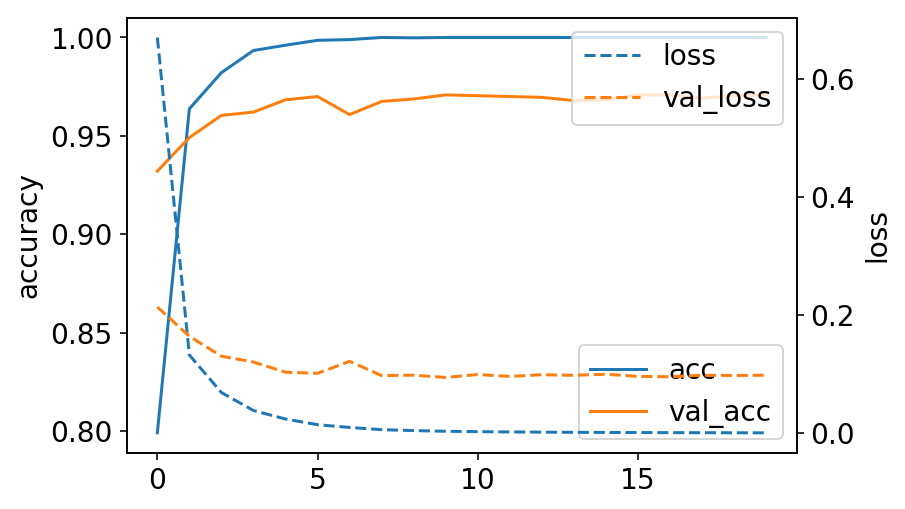

In [30]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss");

#### Batch Normalization defenitely speeds up training time!!!!!!!!!

In [1]:
# your code here

## Question 2

For most real world applications we do not have enough labelled images to train a large neural network from scratch. Instead we can use a pre-trained network as a feature transformer and train a smaller model (or even just a logistic regression) on the output of the pre-trained network.

There are several pretrained networks available as part of keras: https://keras.io/applications/. The documentation usually gives some information or links about each network.

The documentation also contains snippets on how to use a pre-trained network as feature transformer ("Extract features with VGG16"). You should be able to generalise from that example using VGG16 to approximately any of the networks available there.

One important thing to not forget is that you need to preprocess your images before feeding them into a pretrained network. Keras provides the functions to do that as well, use them :) You might also need to resize your images first.

The task for this question is to build a classifier that can tell road bikes from mountain bikes. Start with using a pre-trained network as feature transformer and logistic regression as classifier on the output of the pretrained network. Once this works you can experiment with extracting features from earlier layers of the pre-trained network, compare your performance to a small network trained from scratch, try to beat your neural net by extracting features by hand and feeding them to a random forest, increasing your dataset size by [augmenting the data](https://keras.io/preprocessing/image/), etc.

The dataset containing about 100 labelled images for each road and mountain bikes is here: https://github.com/wildtreetech/advanced-computing-2018/blob/master/data/road-and-mountain-bikes.zip

In [44]:
img_path = 'mountain_bikes\mountain_bike_23.jpg'
img = image.load_img(img_path, target_size=(224, 224))

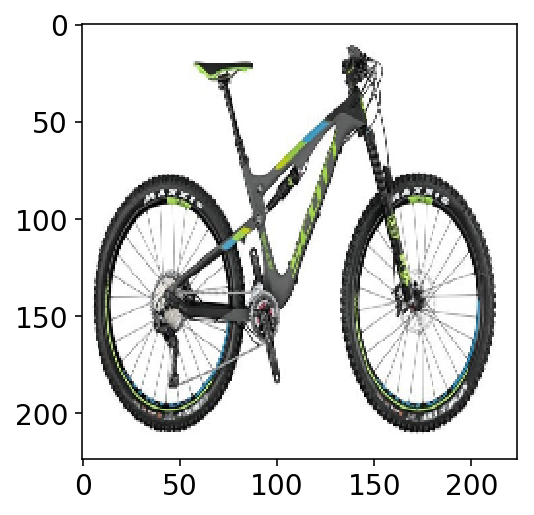

In [45]:
plt.imshow(img)

In [256]:
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np


# for example load the VGG16 network
model = applications.VGG16(include_top=True,
                           weights='imagenet')

img_path = 'mountain_bikes\mountain_bike_23.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

553467904/553467096 [==============================] - 40s 0us/step


In [257]:
x.shape

(1, 224, 224, 3)

In [258]:
features.shape

(1, 1000)

In [259]:
features.ravel()

array([3.07736912e-07, 3.13993581e-07, 1.82773775e-07, 1.79606161e-07,
       2.21564790e-07, 1.09703336e-07, 1.82521109e-08, 5.60065700e-06,
       8.32437138e-07, 1.56040301e-06, 2.00827714e-07, 9.85275733e-07,
       2.22731686e-07, 4.26518426e-07, 5.90639445e-07, 8.23103107e-07,
       1.97917825e-06, 2.04164880e-05, 2.32691445e-06, 9.27638553e-08,
       4.47559472e-07, 6.78173501e-06, 1.77645359e-06, 1.07564765e-05,
       7.92037554e-06, 6.38354277e-06, 5.61239005e-07, 5.66461949e-07,
       3.88517083e-06, 7.46046993e-08, 8.29633535e-08, 2.62906241e-07,
       1.51128347e-07, 3.12233595e-07, 8.08383049e-07, 4.52984182e-07,
       1.39961958e-06, 1.95783983e-07, 2.10818894e-06, 2.17170464e-06,
       2.73548108e-06, 1.03585580e-05, 3.16451019e-06, 5.13807936e-06,
       7.75509488e-06, 8.96300776e-07, 5.31863498e-06, 5.86310762e-07,
       1.39903960e-07, 3.09619645e-06, 1.68597144e-05, 3.55851910e-07,
       6.56818884e-06, 7.20430080e-07, 5.54315932e-07, 5.54769713e-07,
      

In [261]:
decode_predictions(features, top=10)[0]

[('n03792782', 'mountain_bike', 0.9286757),
 ('n03127747', 'crash_helmet', 0.029927345),
 ('n04509417', 'unicycle', 0.008912303),
 ('n03208938', 'disk_brake', 0.0076393033),
 ('n04482393', 'tricycle', 0.0030374909),
 ('n02835271', 'bicycle-built-for-two', 0.0025879943),
 ('n04485082', 'tripod', 0.0023085403),
 ('n09193705', 'alp', 0.001647528),
 ('n03785016', 'moped', 0.0016127239),
 ('n03891332', 'parking_meter', 0.0010968745)]

In [51]:
from sklearn.linear_model import LogisticRegression
import glob

In [50]:
clf = LogisticRegression()

In [53]:
mount_bikes = []
for filename in glob.glob('mountain_bikes\*.jpg'):
    img = image.load_img(filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    mount_bikes.append(features)

In [60]:
road_bikes = []
for filename in glob.glob('road_bikes\*.jpg'):
    img = image.load_img(filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    road_bikes.append(features)

## Preprocessing of features into array(n_samples, n_features)


In [95]:
np.array(mount_bikes).shape

(105, 1, 7, 7, 512)

In [96]:
features_mb = np.array(mount_bikes)[:,0,:,:,:]

In [97]:
features_mb.shape

(105, 7, 7, 512)

In [98]:
f_mb = np.zeros((105,7*7*512))
for i,array in enumerate(features_mb):
    f_mb[i,:] = features_mb[i,:,:,:].flatten()

In [99]:
f_mb.shape

(105, 25088)

In [101]:
features_rb = np.array(road_bikes)[:,0,:,:,:]

In [102]:
f_rb = np.zeros((106,7*7*512))
for i,array in enumerate(features_rb):
    f_rb[i,:] = features_rb[i,:,:,:].flatten()

In [103]:
f_rb.shape

(106, 25088)

In [106]:
all_features = np.vstack((f_mb,f_rb))

In [107]:
all_features.shape

(211, 25088)

In [109]:
labels = np.hstack((np.zeros(105),np.ones(106)))

In [110]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [111]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_val, y_train, y_val = train_test_split(all_features, labels,
                                                  test_size=0.5,
                                                  random_state=42)

In [122]:
y_val

array([0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1.])

In [123]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
clf.score(X_val,y_val)

1.0

#### Even test size = 0.5!!!!

In [198]:
X_train, X_val, y_train, y_val = train_test_split(all_features, labels,
                                                  test_size=0.98,
                                                  random_state=30)

In [199]:
y_train

array([0., 1., 1., 0.])

In [200]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [201]:
clf.score(X_val,y_val)

0.9758454106280193

## Insane!!! works on 4 labels only!!!

## Lets compare it with my NN

In [207]:
from keras.layers import Conv3D

In [298]:
mount_bikes_pic = []
for filename in glob.glob('mountain_bikes\*.jpg'):
    img = image.load_img(filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    mount_bikes_pic.append(x)

In [299]:
mount_bikes_pic = np.array(mount_bikes_pic)[:,0,:,:,:]

In [300]:
mount_bikes_pic.shape

(105, 224, 224, 3)

In [301]:
road_bikes_pic = []
for filename in glob.glob('road_bikes\*.jpg'):
    img = image.load_img(filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    road_bikes_pic.append(x)

In [302]:
road_bikes_pic = np.array(road_bikes_pic)[:,0,:,:,:]

In [303]:
road_bikes_pic.shape

(106, 224, 224, 3)

In [304]:
pics = np.vstack((mount_bikes_pic,road_bikes_pic))

In [305]:
pics.shape

(211, 224, 224, 3)

In [306]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [307]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

y_labels = one_hot(2, labels.astype('int'))

In [291]:
X_train, X_val, y_train, y_val = train_test_split(pics, y_labels,
                                                  test_size=0.1,
                                                  random_state=30)

In [310]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

In [321]:
input_image = Input(shape=(224, 224, 3))
x = BatchNormalization()(x)
x = Conv2D(32, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Dropout(0.15)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = BatchNormalization()(x)
x = Conv2D(128, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Dropout(0.15)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(2, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

In [322]:
convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [323]:
history_callback = convnet.fit(X_train, y_train,
                               batch_size=12,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 132 samples, validate on 57 samples
Epoch 1/20
132/132 [==============================] - 34s 257ms/step - loss: 0.4642 - acc: 0.7803 - val_loss: 3.1956e-04 - val_acc: 1.0000
Epoch 2/20
132/132 [==============================] - 32s 242ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.1485 - val_acc: 0.8596
Epoch 3/20
132/132 [==============================] - 31s 238ms/step - loss: 1.3557e-04 - acc: 1.0000 - val_loss: 0.2922 - val_acc: 0.9825
Epoch 4/20
132/132 [==============================] - 31s 237ms/step - loss: 3.9240e-07 - acc: 1.0000 - val_loss: 1.4640e-07 - val_acc: 1.0000
Epoch 5/20
132/132 [==============================] - 32s 240ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/20
132/132 [==============================] - 32s 241ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
132/132 [==============================] - 44s 337ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss:

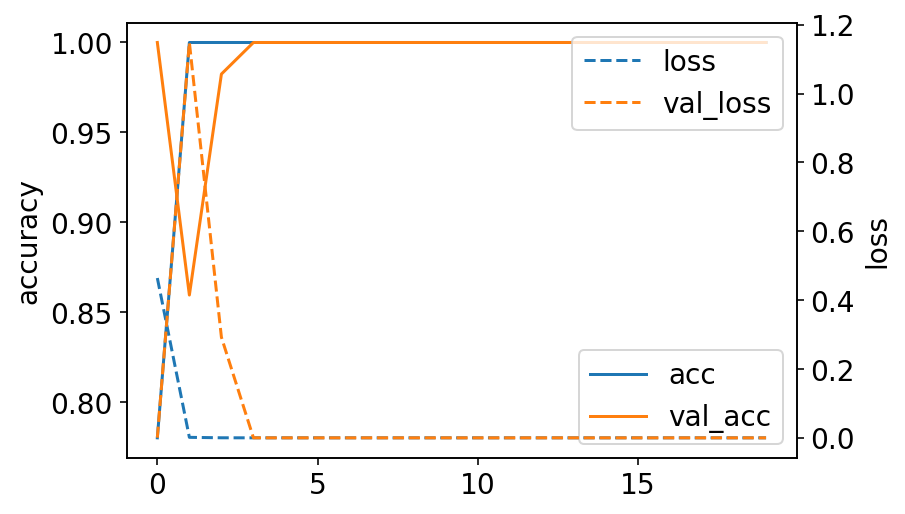

In [324]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss");

## Question 3

Think about what project you want to do. What makes a good project? It should use some of what you learnt in this class, there should be labelled data available already, and it should be something you are interested in.

You will have to write a short report on what you did. To write an interesting report you need to tell a story, not just first I did A, then I did B, then I did X and finally D.

It also has to go a bit beyond simply training a classifier or regression model.

An example based on the bike images from the previous question:

A local bike shop wants to keep an eye on sales of bikes on ebay. They specialise in road bikes so they want to be able to filter out all adverts for mountain bikes. They have found that people writing ebay adverts are not very good at correctly labelling their adverts. Can they use machine-learning to help classify adverts?

We investigate labelling adverts based on the image in the advert and study different trade offs in misclassifying bikes. The network was trained on 100 images from a catalog which show bikes on a white background. We compare the performance of the network on the training data and a small set of hand labelled images of bikes in the wild.

## Neural Networks as an application to Dispersion Engeering of the eigen modes in SiN microresonators (to be continued)